In [2]:
import sys
import random
import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import dataloader
import util
import autoencoderdual

Loaded training data x (60000, 28, 28, 1) and y (60000, 128) and y_labels (60000,)
Loaded testing data x (10000, 28, 28, 1) and y (10000, 128) and y_labels (10000,)


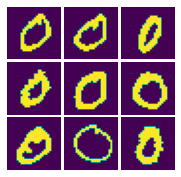

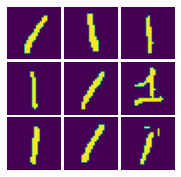

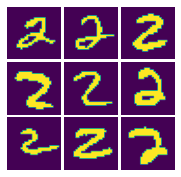

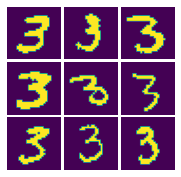

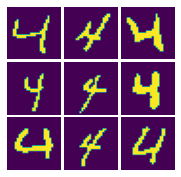

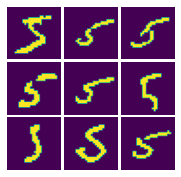

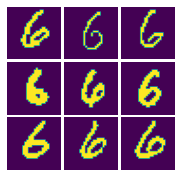

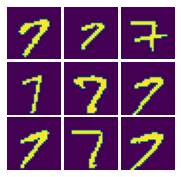

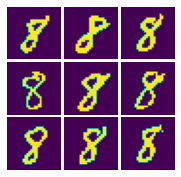

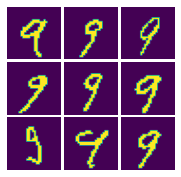

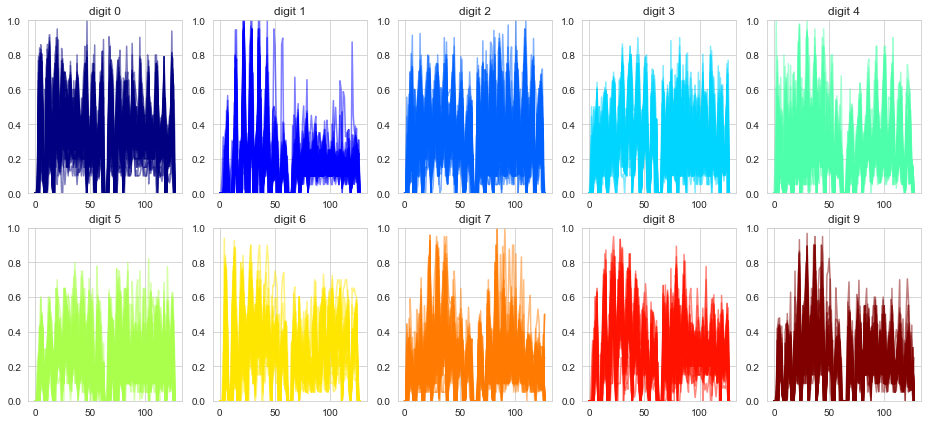

In [3]:
#to retrain or not to retrain
load = False
#load = True

#load data
dataset = dataloader.DataLoader(verbose=True)
x_train, x_test, y_train, y_test, y_reg_train, y_reg_test = dataset.load_data()

#visualize first 9 samples of input images/data based on class labels, within the training dataset
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    fig = util.plot_tile(x_train_perlabel[0:9, :, :])

fig = util.plot_signals(y_reg_train, y_train)
fig.savefig('readme/signals.png')

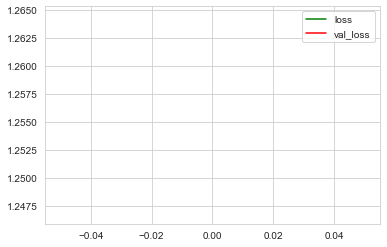

(150, 6)
(150, 2)


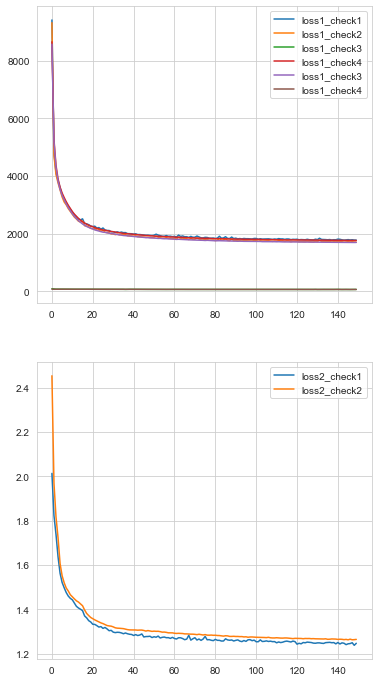

In [4]:
#load trained architecture, to retrain set "load=False", ~1hr on NVIDIA RTX2080Ti
LSDA = autoencoderdual.Autoencoder(x_train, y_reg_train, variational=True)
LSDA.train_autoencoder_dual_LSF_var(epoch=50, load=load)

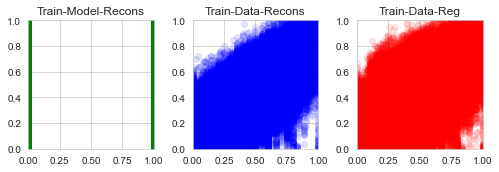

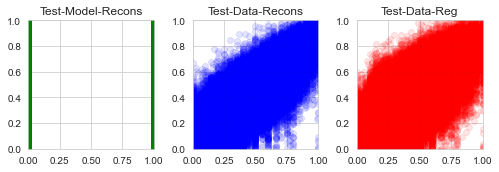

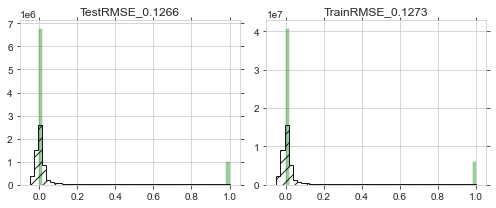

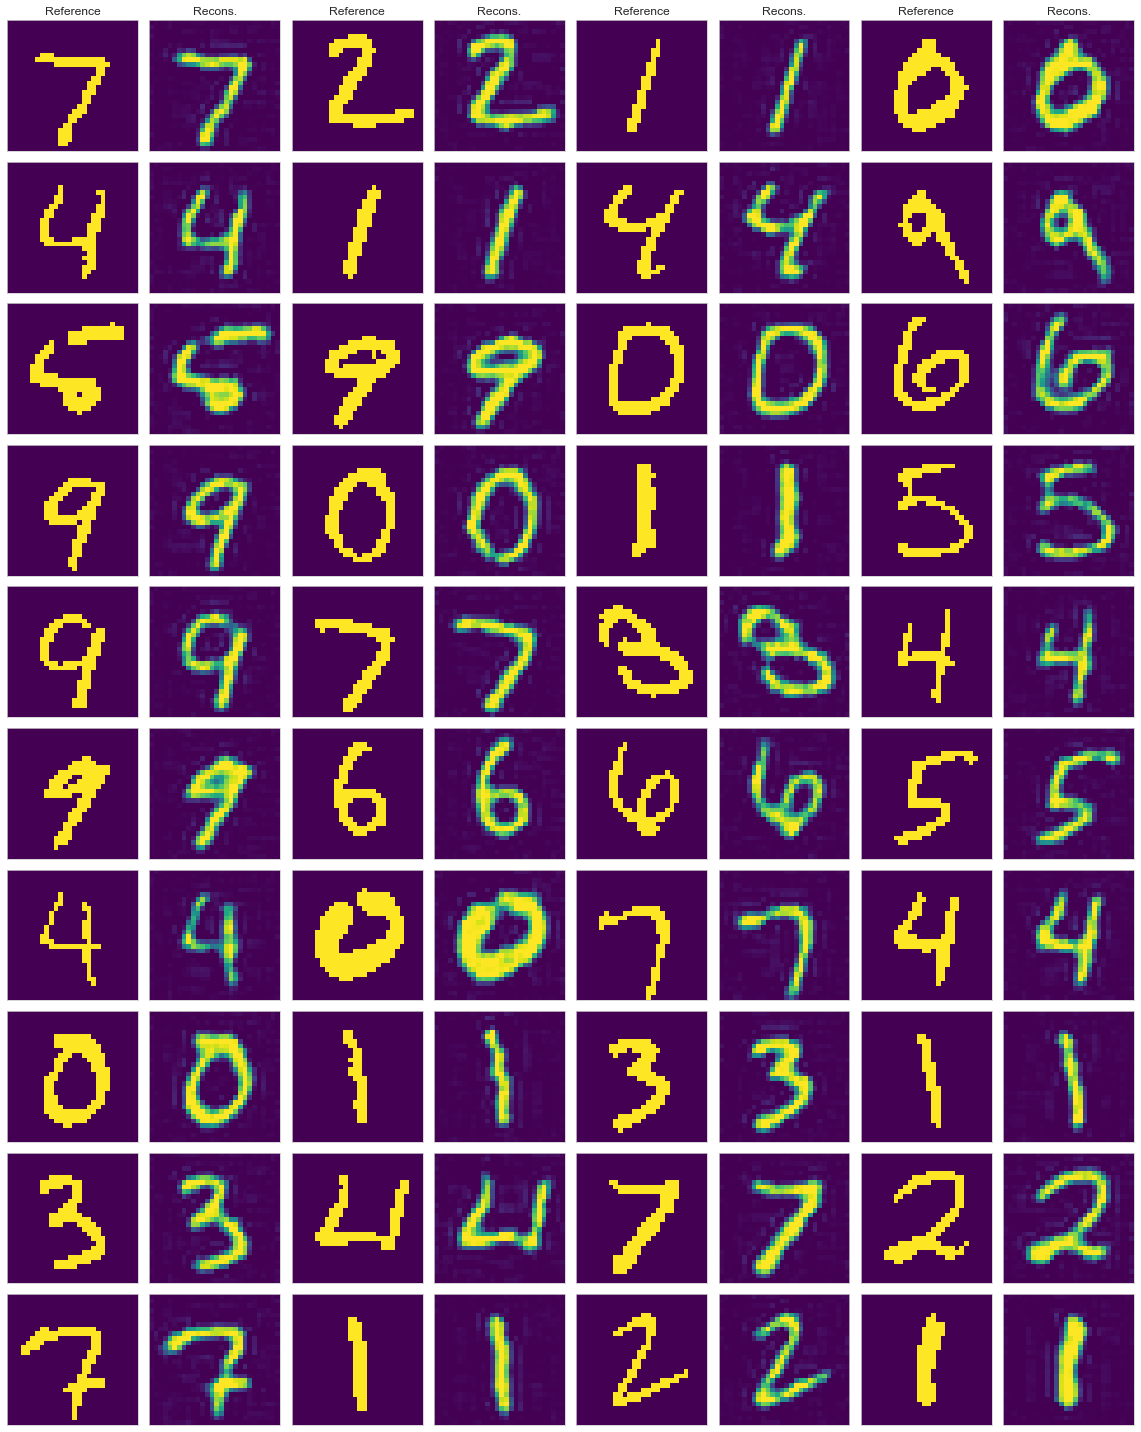

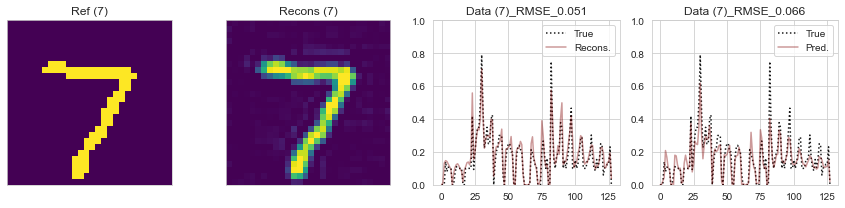

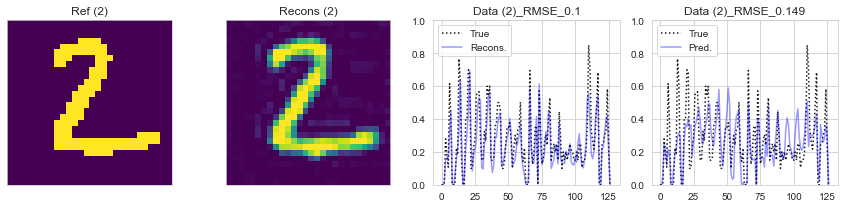

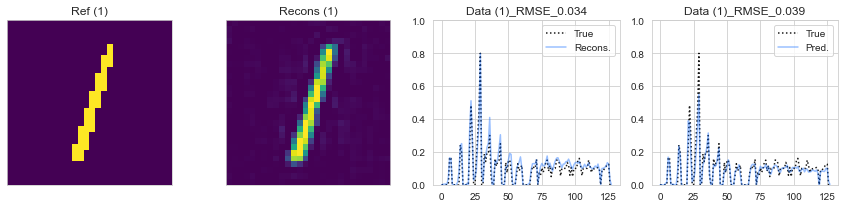

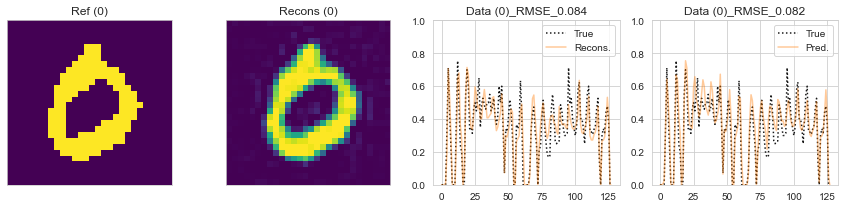

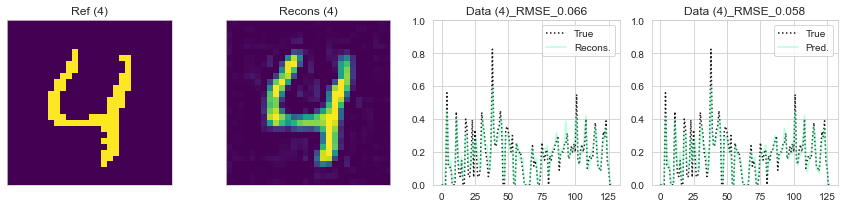

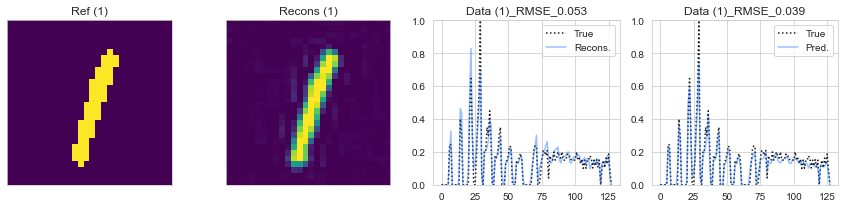

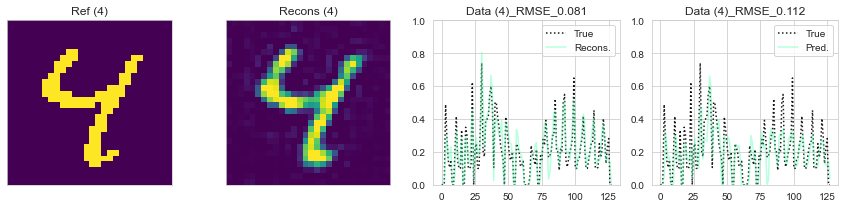

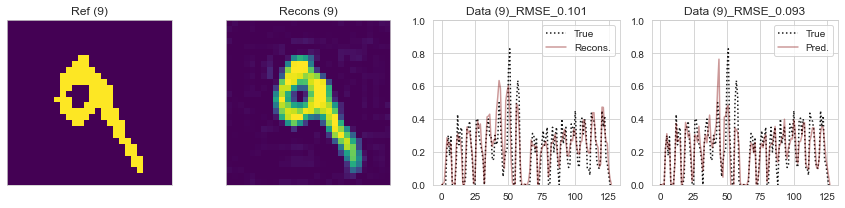

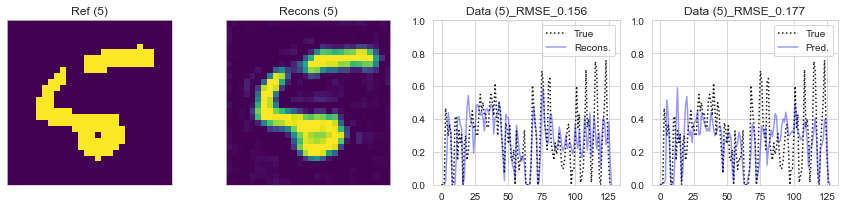

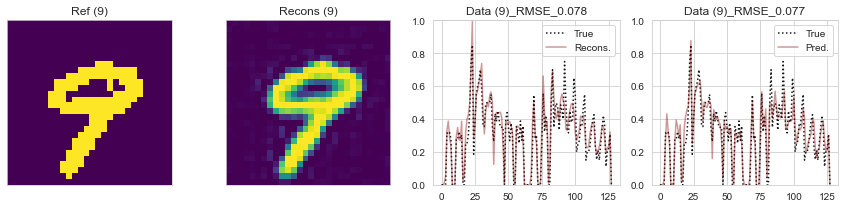

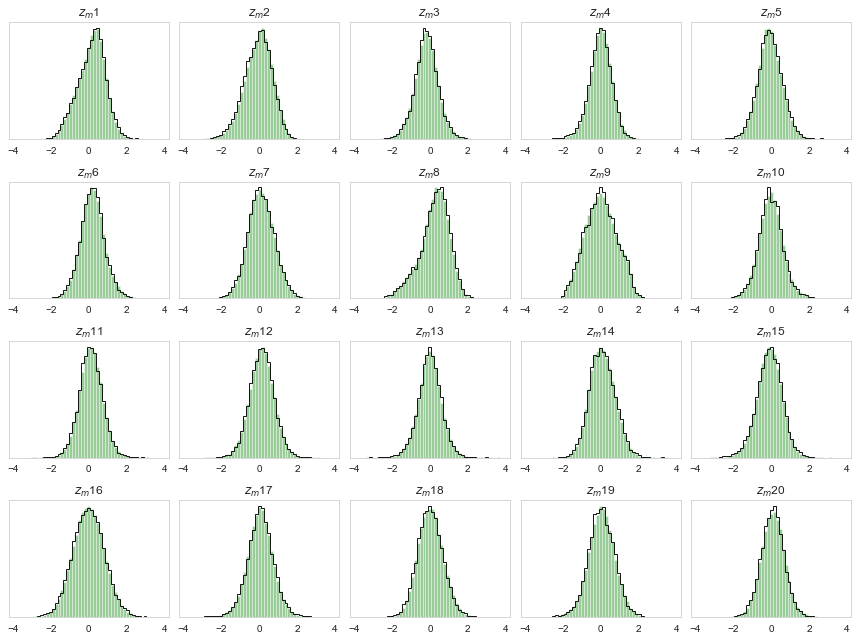

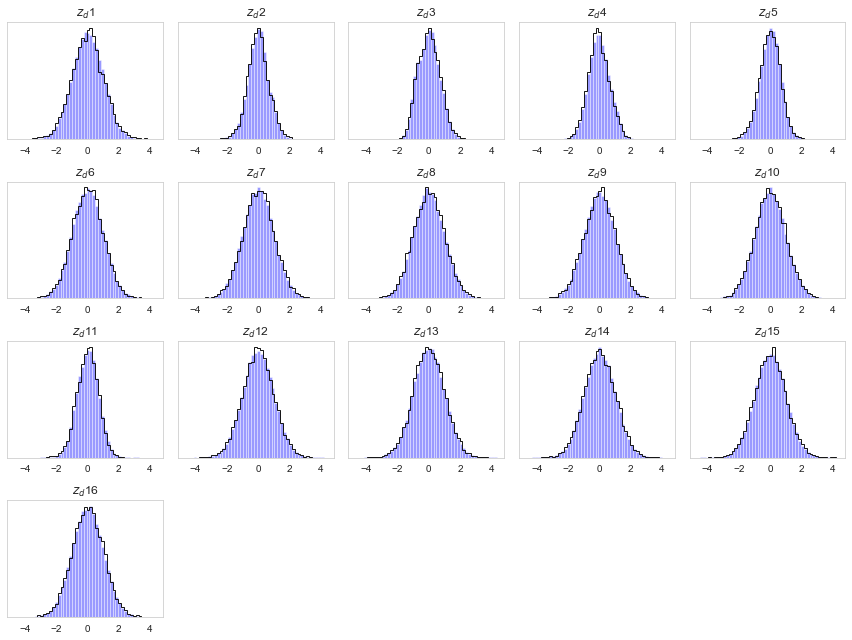

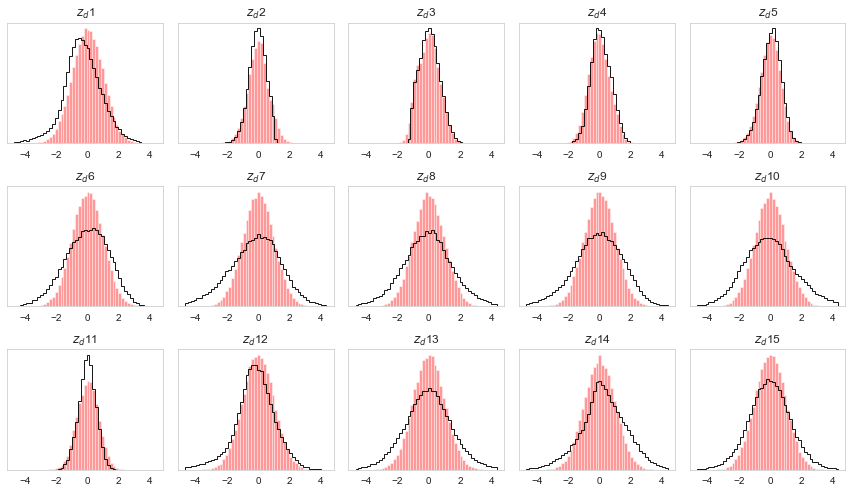

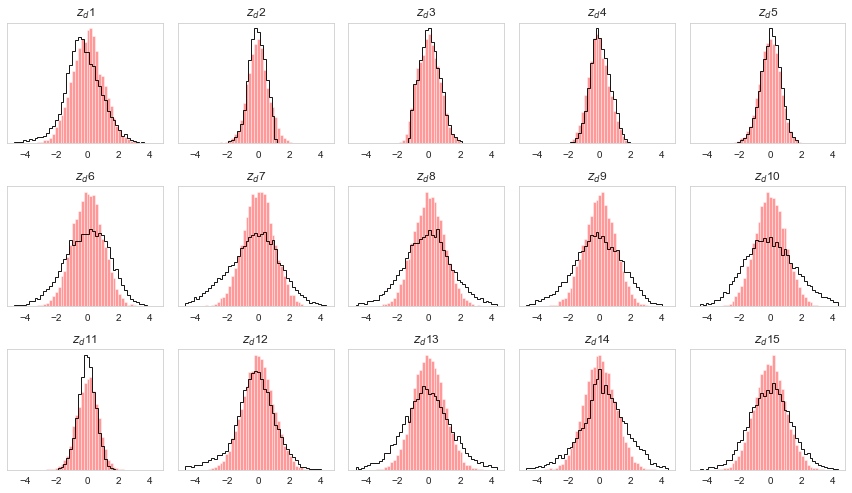

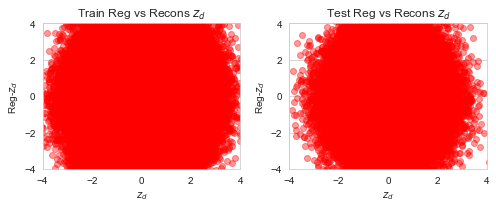

In [5]:
autoencoderdual.inspect_LSF(LSDA, x_test, y_reg_test, y_test)
autoencoderdual.inspect_LSF_z(LSDA, x_test, y_reg_test, y_test)

In [6]:
print("QC complete")

QC complete
